#Importação de bibliotecas e dos dados

In [ ]:
!pip install opendatasets panda kagglehub kagglehub[pandas-datasets] scikit-learn librosa

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import opendatasets as od
import os
import librosa                                                             # librosa | Biblioteca que permite carregar aquivos .wav
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from dateutil.relativedelta import relativedelta

Acesse as configurações do Kaggle [Clicando aqui](https://www.kaggle.com/settings) e baixe o token apertando no botão API > (Create new token)

Depois que você baixar o arquivo, o insira no upload de arquivos abaixo

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naiarawn","key":"54017198e0a1b306aafb447713458c5d"}'}

Criar a pasta oculta onde o Kaggle espera o arquivo

In [ ]:
!mkdir -p ~/.kaggle

Mover o arquivo kaggle.json para dentro dessa pasta

In [ ]:
!mv kaggle.json ~/.kaggle/

Corrigir as permissões do arquivo

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

##Carrega a base de dados gtzan-dataset-music-genre-classification

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
 99% 1.20G/1.21G [00:22<00:00, 188MB/s]
100% 1.21G/1.21G [00:22<00:00, 58.8MB/s]


In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q gtzan-dataset-music-genre-classification.zip -d gtzan

Lista os gêneros disponíveis na base de dados GTZAN

In [ ]:
base_dir = "gtzan/Data/"
genres = os.listdir(base_dir+"genres_original")
print("Gêneros:", genres)

Gêneros: ['blues', 'metal', 'disco', 'reggae', 'jazz', 'country', 'hiphop', 'rock', 'pop', 'classical']


##Carrega a base de dados 30000-spotify-songs

In [ ]:
dfSongs = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "joebeachcapital/30000-spotify-songs",
    "spotify_songs.csv"
)

dfSongs.head()

/tmp/ipython-input-3056733368.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  dfSongs = kagglehub.load_dataset(


100%|██████████| 3.01M/3.01M [00:01<00:00, 2.34MB/s]

Extracting zip of spotify_songs.csv...


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
print(dfSongs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
print(len(dfSongs))

32833


Se a base de dados do script passado não rodar, baixe o csv manualmente [clicando aqui](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs), carregue o csv dentro do colab e execute o script seguinte

In [ ]:
dfSongs = pd.read_csv('spotify_songs.csv')

Verificação de colunas númericas

In [ ]:
dfSongs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Verificação de valores ausentes

Removendo valores Ausentes que foram apresentados

In [ ]:
# Valores ausentes
print("Valores ausentes por coluna:\n", dfSongs.isnull().sum())

Valores ausentes por coluna:
 track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [ ]:
dfSongs = dfSongs.dropna()
print("Valores ausentes por coluna após remoção:\n", dfSongs.isnull().sum())

Valores ausentes por coluna após remoção:
 track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


Verificação de linhas duplicadas

In [ ]:
# Linhas duplicadas
print("Linhas duplicadas:", dfSongs.duplicated().sum())

Linhas duplicadas: 0


Descobrindo o período (intervalo de tempo) coberto pela base de dados, relacionando à data de lançamento do álbum ou da música.

In [ ]:
# Converter a coluna de datas para o tipo datetime
dfSongs['track_album_release_date'] = pd.to_datetime(dfSongs['track_album_release_date'], errors='coerce')

# Mostrar a menor e a maior data disponíveis
inicio = dfSongs['track_album_release_date'].min()
fim = dfSongs['track_album_release_date'].max()
rangeData = relativedelta(fim.date(), inicio.date())

print(f" Período coberto pela base de dados: de {inicio.date().strftime("%d/%m/%Y")} até {fim.date().strftime("%d/%m/%Y")}")
print(f" período total: {(rangeData.years)} anos, {(rangeData.months)} meses e {(rangeData.days)} dias")

 Período coberto pela base de dados: de 01/01/1957 até 29/01/2020
 período total: 63 anos, 0 meses e 28 dias


Mostrando através de um gráfico, o eixo X (horizontal) mostra os anos dos lançamentos. Já o eixo Y (vertical) mostra quantas músicas foram lançadas em cada ano. Desta forma, é possível visualizar em quais períodos há mais registros.

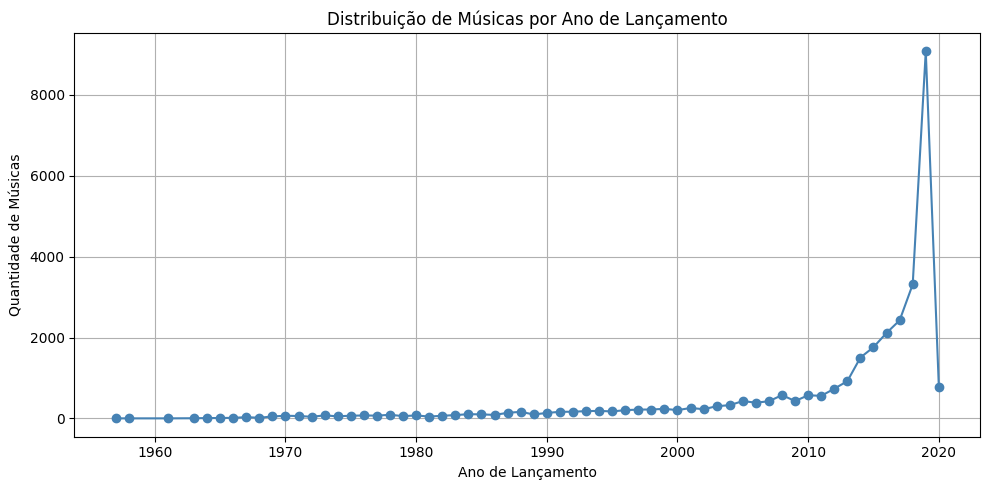

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que a coluna de data esteja no formato datetime
dfSongs['track_album_release_date'] = pd.to_datetime(dfSongs['track_album_release_date'], errors='coerce')

# Remover valores ausentes de data
dfSongs = dfSongs.dropna(subset=['track_album_release_date'])

# Criar uma coluna apenas com o ano de lançamento
dfSongs['ano_lancamento'] = dfSongs['track_album_release_date'].dt.year

# Contar quantas músicas por ano
musicas_por_ano = dfSongs['ano_lancamento'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(10,5))
plt.plot(musicas_por_ano.index, musicas_por_ano.values, marker='o', linestyle='-', color='steelblue')

plt.title('Distribuição de Músicas por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Músicas')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3318610316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


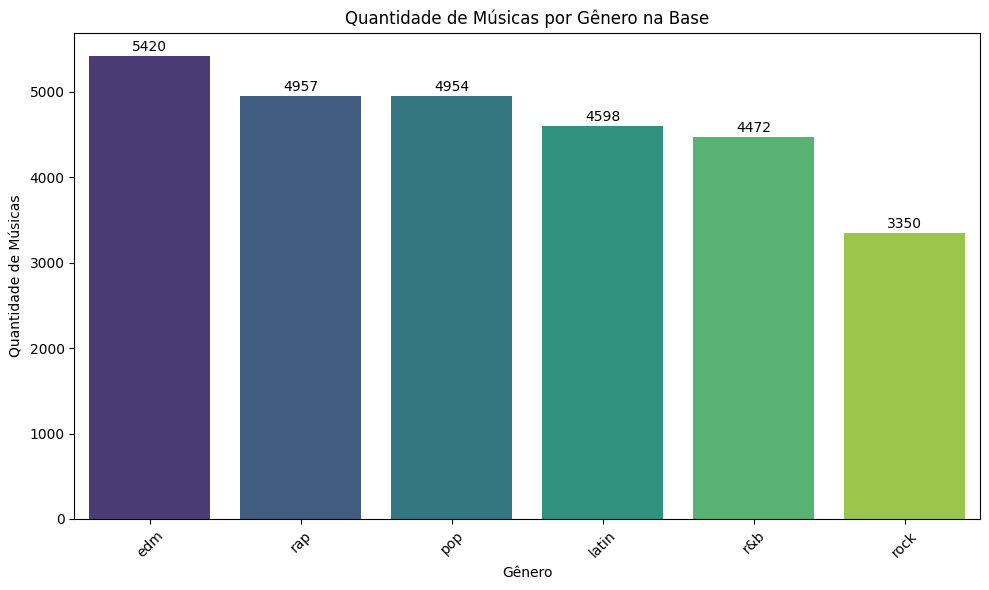

In [ ]:
# Contagem de músicas por gênero
genre_counts = dfSongs['playlist_genre'].value_counts().reset_index()
genre_counts.columns = ['playlist_genre', 'quantidade']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=genre_counts,
    x='playlist_genre',
    y='quantidade',
    palette='viridis'
)

plt.title('Quantidade de Músicas por Gênero na Base')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Músicas')
plt.xticks(rotation=45)

# Adicionar labels
for i, row in genre_counts.iterrows():
    ax.text(
        i,                                  # posição x
        row['quantidade'] + 20,             # posição y (um pouco acima da barra)
        str(row['quantidade']),             # texto
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


Quantificando os outliers numericamente usando o método do IQR (Intervalo Interquartil), utiliizando as principais variáveis continuas:

### Dicionário dos valores

Essa tabela foi retirada da própria base de dados

| Atributo | Descrição                      |
|-------------|:----------------------------|
| track_popularity | Popularidade da música (0-100), onde quanto maior, melhor. |
| danceability | A dançabilidade descreve o quão adequada uma música é para<br/> dançar, com base em uma combinação de elementos musicais, incluindo<br/> andamento, estabilidade rítmica, intensidade da batida e regularidade geral.<br/> Um valor de 0,0 representa a menor dançabilidade e 1,0 a maior dançabilidade. |
| energy | A energia é uma medida de 0,0 a 1,0 e representa uma percepção de<br/> intensidade e atividade. Normalmente, faixas energéticas soam rápidas, altas<br/> e ruidosas. Por exemplo, o death metal tem alta energia, enquanto um<br/> prelúdio de Bach tem baixa energia. Características perceptivas que<br/> contribuem para esse atributo incluem faixa dinâmica, volume percebido,<br/> timbre, taxa de início e entropia geral. |
| loudness | A intensidade sonora geral de uma faixa em decibéis (dB). Os<br/> valores de intensidade sonora são calculados como a média de toda a faixa e são<br/> úteis para comparar a intensidade sonora relativa de diferentes<br/> faixas. A intensidade sonora é a qualidade de um som que é o principal<br/> correlato psicológico da força física (amplitude). Os valores típicos variam<br/> entre -60 e 0 dB. |
| acousticness | Uma medida de confiança de 0,0 a 1,0 que indica se a faixa é<br/> acústica. 1,0 representa alta confiança de que a faixa é acústica. |
| valence | Uma escala de 0,0 a 1,0 que descreve a positividade musical transmitida por uma<br/>  faixa. Faixas com alta valência soam mais positivas (por exemplo,<br/>  alegres, animadas, eufóricas), enquanto faixas com baixa valência soam mais<br/>  negativas (por exemplo, tristes, deprimidas, raivosas). |
| tempo | O andamento geral estimado de uma faixa em batidas por minuto (BPM).<br/>  Em terminologia musical, o andamento é a velocidade ou o ritmo de uma<br/>  determinada peça e deriva diretamente da duração média de cada batida. |
| duration_ms | Duração da música em milissegundos |



In [ ]:
# Lista de variáveis contínuas importantes
cols = [
    'track_popularity', 'danceability', 'energy', 'loudness',
    'valence', 'tempo', 'duration_ms'
]

In [ ]:
# Detectar outliers numéricos
print(f"Quantidade de dados: {len(dfSongs)}\n")

for col in cols:
    Q1 = dfSongs[col].quantile(0.25)
    Q3 = dfSongs[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dfSongs[(dfSongs[col] < Q1 - 1.5 * IQR) | (dfSongs[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

Quantidade de dados: 30942

track_popularity: 0 outliers
danceability: 299 outliers
energy: 272 outliers
loudness: 963 outliers
valence: 0 outliers
tempo: 599 outliers
duration_ms: 1362 outliers


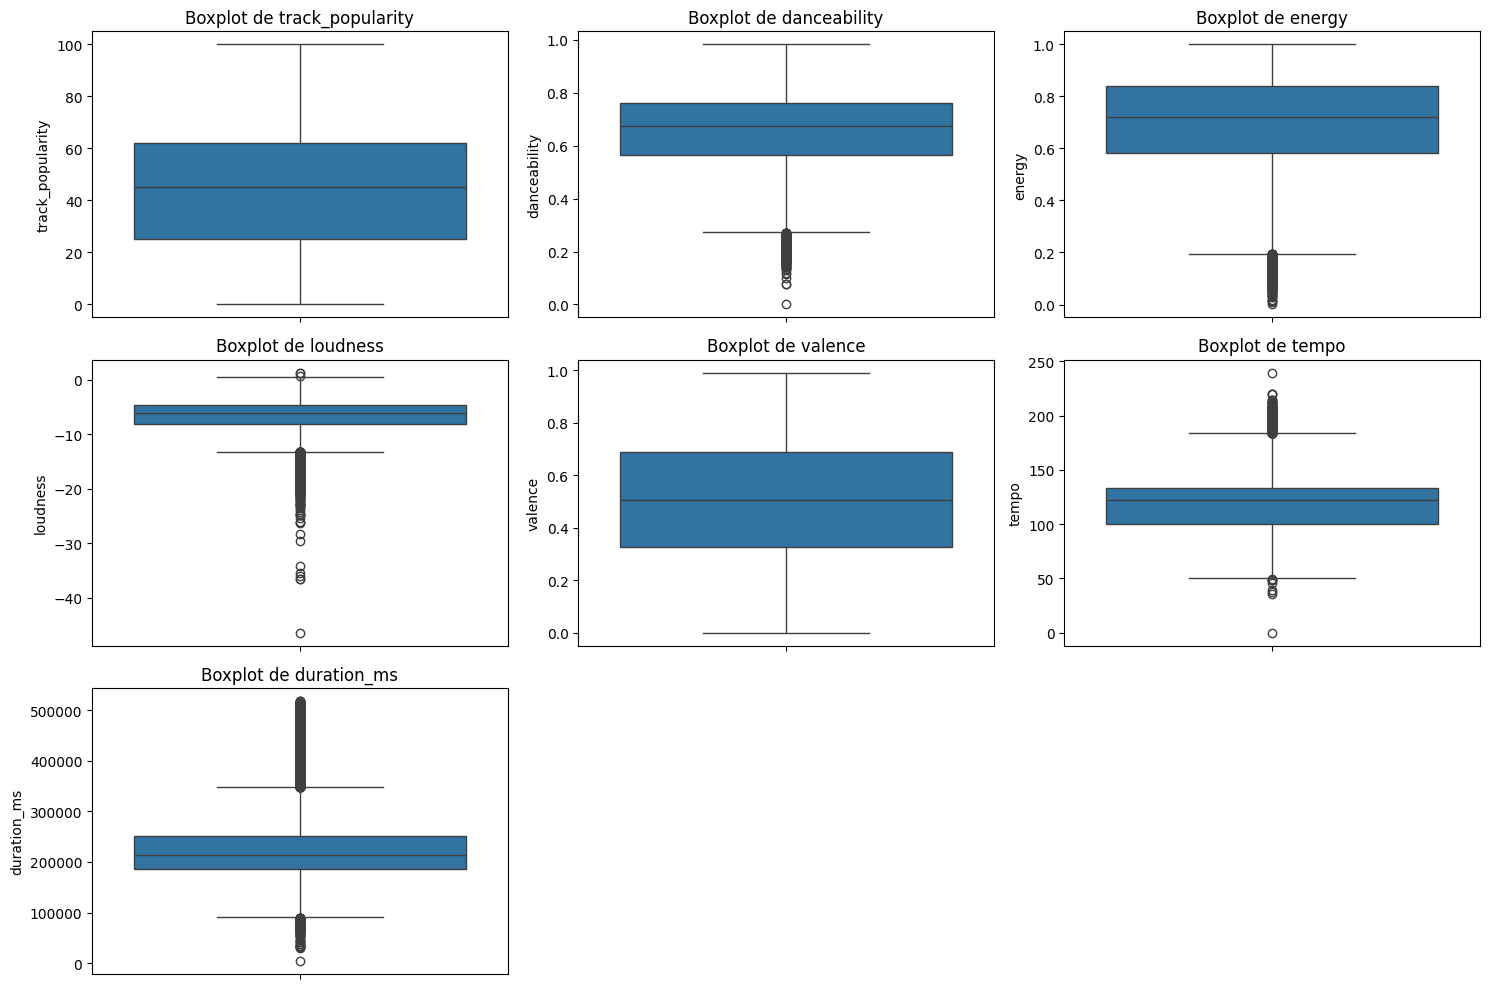

In [ ]:
# Criar boxplots para as variáveis contínuas importantes
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=dfSongs[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Remoção dos outliers

In [ ]:
df_clean = dfSongs.copy()

for col in cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Quantidade de dados após remoção: {len(df_clean)}")
print(f"Quantidade de dados removidos: {len(dfSongs)-len(df_clean)}")


Quantidade de dados após remoção: 27751
Quantidade de dados removidos: 3191


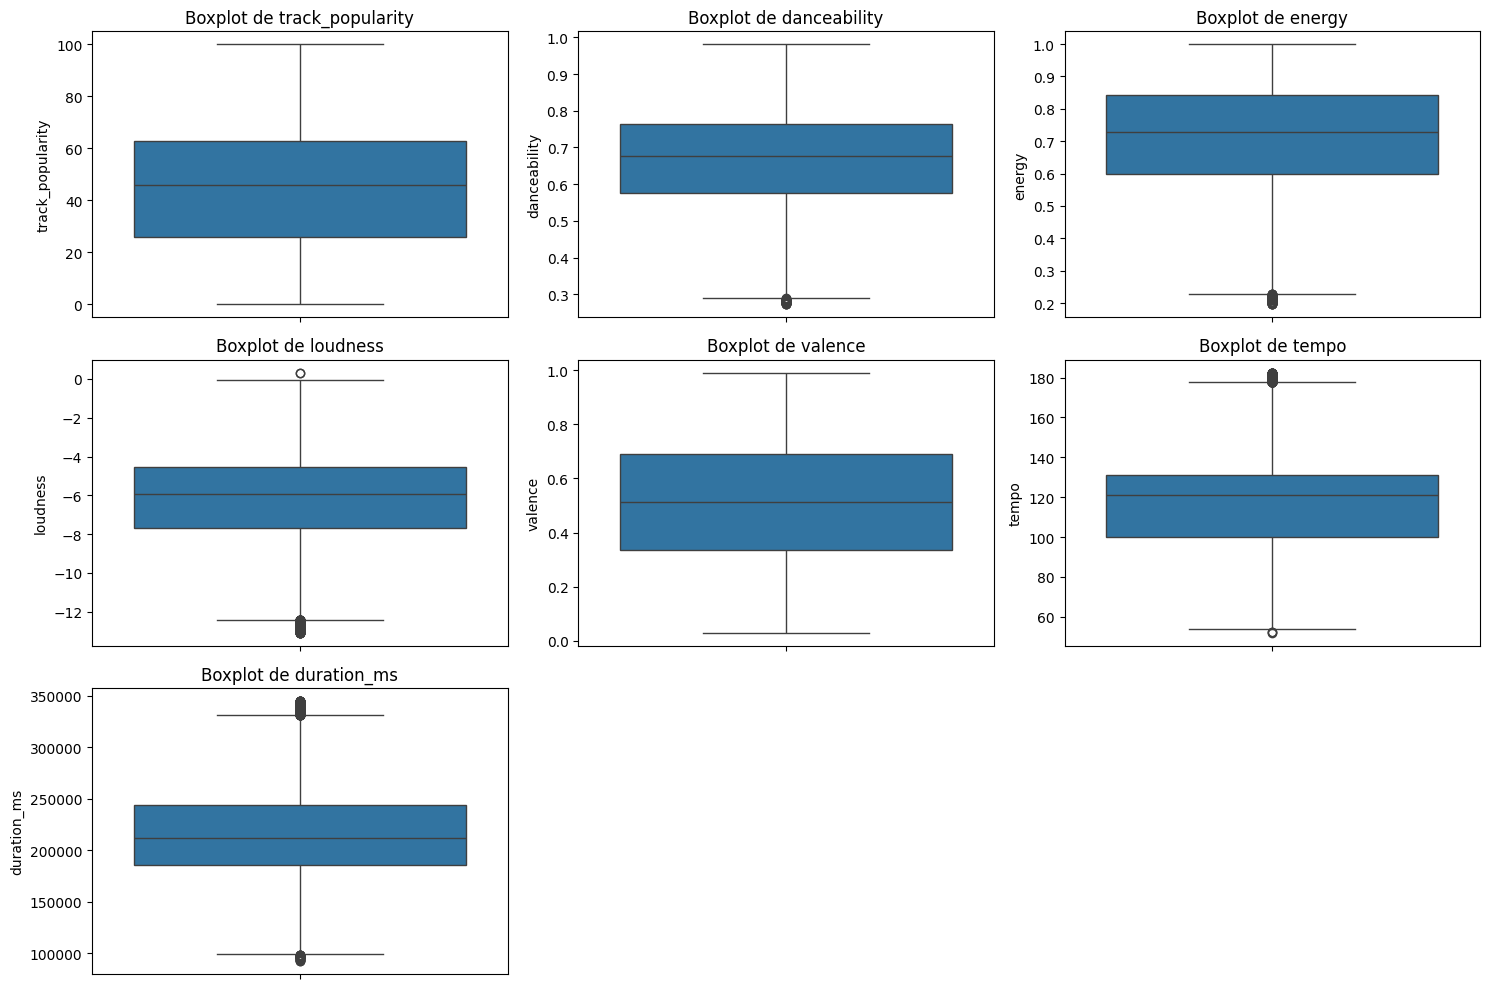

In [ ]:
# plota os gráficos novamente
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Aplicação da remoção de outliers

In [ ]:
dfSongs = df_clean

#Análises descritiva por quartil

In [ ]:
# Calcula os quartis para popularidade da faixa
Q1 = dfSongs['track_popularity'].quantile(0.25)
Q2 = dfSongs['track_popularity'].quantile(0.50)
Q3 = dfSongs['track_popularity'].quantile(0.75)
Q4 = dfSongs['track_popularity'].max()

print(f"Quartil 1 (Q1): <= {Q1}")
print(f"Quartil 2 (Q2): > {Q1} e <= {Q2}")
print(f"Quartil 3 (Q3): > {Q2} e <= {Q3}")
print(f"Quartil 4 (Q4): > {Q3} e <= {Q4}")

# Analisa as características de cada quartil.
quartiles = {
    'Quartil 1': dfSongs[dfSongs['track_popularity'] <= Q1],
    'Quartil 2': dfSongs[(dfSongs['track_popularity'] > Q1) & (dfSongs['track_popularity'] <= Q2)],
    'Quartil 3': dfSongs[(dfSongs['track_popularity'] > Q2) & (dfSongs['track_popularity'] <= Q3)],
    'Quartil 4': dfSongs[(dfSongs['track_popularity'] > Q3) & (dfSongs['track_popularity'] <= Q4)]
}

# Define a lista de características a serem descritas, reutilizando a lista 'caracteristicas' da execução anterior.
caracteristicas = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'tempo', 'loudness', 'speechiness'
]


for quartile_name, df_quartile in quartiles.items():
    print(f"\n--- Análise Descritiva para {quartile_name} ---")
    display(df_quartile[caracteristicas].describe())
    print(f"Gêneros mais frequentes em {quartile_name}:\n")
    display(df_quartile['playlist_genre'].value_counts().head())

Quartil 1 (Q1): <= 26.0
Quartil 2 (Q2): > 26.0 e <= 46.0
Quartil 3 (Q3): > 46.0 e <= 63.0
Quartil 4 (Q4): > 63.0 e <= 100

--- Análise Descritiva para Quartil 1 ---


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
count,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000,7086.000000
mean,0.652631,0.738848,0.505317,0.138268,0.104945,119.625111,-6.324122,0.107446
std,0.133049,0.163900,0.238106,0.188454,0.243198,23.980915,2.498888,0.101597
min,0.272000,0.200000,0.031200,0.000001,0.000000,52.017000,-13.090000,0.022400
25%,0.562000,0.627000,0.314000,0.008350,0.000000,100.016500,-7.849750,0.041600
50%,0.661000,0.761500,0.509000,0.053000,0.000048,123.008000,-5.964500,0.063300
75%,0.749000,0.872000,0.695000,0.194000,0.014900,129.980000,-4.501250,0.132000
max,0.975000,0.999000,0.980000,0.984000,0.972000,182.448000,-0.073000,0.860000


Gêneros mais frequentes em Quartil 1:



,count
playlist_genre,
edm,1780
r&b,1305
rap,1101
pop,1031
rock,951



--- Análise Descritiva para Quartil 2 ---


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
count,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000
mean,0.662774,0.721309,0.498280,0.161964,0.092832,119.785058,-6.416225,0.108178
std,0.134849,0.167874,0.230798,0.207939,0.230401,23.872945,2.398977,0.101384
min,0.276000,0.196000,0.032000,0.000001,0.000000,52.538000,-13.083000,0.022400
25%,0.574000,0.606000,0.319000,0.011600,0.000000,100.128250,-7.924000,0.041400
50%,0.674000,0.740000,0.498000,0.070200,0.000035,122.019000,-6.123500,0.063600
75%,0.761000,0.858000,0.678000,0.233000,0.009843,130.024000,-4.630750,0.135000
max,0.981000,0.997000,0.991000,0.989000,0.966000,182.188000,0.326000,0.877000


Gêneros mais frequentes em Quartil 2:



,count
playlist_genre,
edm,1792
rap,1254
pop,1039
latin,1036
r&b,986



--- Análise Descritiva para Quartil 3 ---


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
count,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,0.666035,0.703524,0.507517,0.179514,0.070319,119.509561,-6.325153,0.109871
std,0.135517,0.170117,0.226886,0.214026,0.205451,25.452883,2.415820,0.102252
min,0.273000,0.197000,0.029200,0.000002,0.000000,57.967000,-13.093000,0.022800
25%,0.575000,0.590000,0.334000,0.019175,0.000000,98.109250,-7.790000,0.041400
50%,0.680000,0.723000,0.509000,0.089000,0.000010,120.183500,-5.968500,0.064850
75%,0.766000,0.837000,0.683000,0.271000,0.002452,133.375500,-4.550500,0.140000
max,0.974000,0.999000,0.990000,0.984000,0.982000,182.141000,-0.046000,0.918000


Gêneros mais frequentes em Quartil 3:



,count
playlist_genre,
rap,1568
pop,1226
latin,1220
edm,1168
r&b,1074



--- Análise Descritiva para Quartil 4 ---


,danceability,energy,valence,acousticness,instrumentalness,tempo,loudness,speechiness
count,6689.000000,6689.000000,6689.000000,6689.000000,6689.000000,6689.000000,6689.000000,6689.000000
mean,0.682208,0.685289,0.533503,0.181453,0.017784,119.344378,-5.943517,0.107408
std,0.136520,0.155132,0.221047,0.202823,0.093681,26.013329,2.185813,0.096788
min,0.276000,0.209000,0.034900,0.000013,0.000000,61.657000,-13.091000,0.023200
25%,0.591000,0.578000,0.363000,0.028100,0.000000,97.963000,-7.140000,0.042500
50%,0.695000,0.700000,0.534000,0.106000,0.000000,118.970000,-5.662000,0.065500
75%,0.783000,0.801000,0.706000,0.264000,0.000105,134.944000,-4.325000,0.132000
max,0.979000,0.993000,0.978000,0.983000,0.951000,182.136000,0.302000,0.609000


Gêneros mais frequentes em Quartil 4:



,count
playlist_genre,
pop,1658
latin,1424
r&b,1107
rap,1034
rock,786


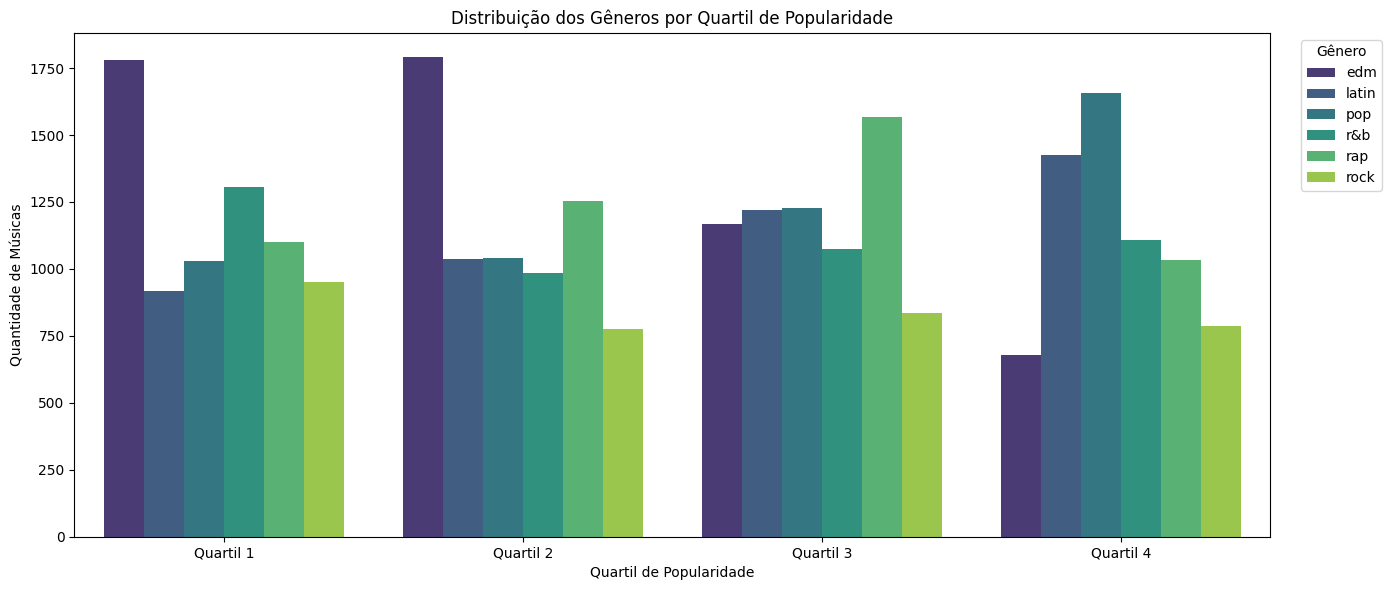

In [ ]:
# Criar coluna indicando o quartil de cada música
def classificar_quartil(x):
    if x <= Q1:
        return "Quartil 1"
    elif x <= Q2:
        return "Quartil 2"
    elif x <= Q3:
        return "Quartil 3"
    else:
        return "Quartil 4"

dfSongs["quartil"] = dfSongs["track_popularity"].apply(classificar_quartil)

# Agrupar por quartil e gênero
quartil_genero = dfSongs.groupby(["quartil", "playlist_genre"])["track_id"].count().reset_index()
quartil_genero.rename(columns={"track_id": "contagem"}, inplace=True)

plt.figure(figsize=(14,6))
sns.barplot(
    data=quartil_genero,
    x="quartil",
    y="contagem",
    hue="playlist_genre",
    palette="viridis"
)

plt.title("Distribuição dos Gêneros por Quartil de Popularidade")
plt.ylabel("Quantidade de Músicas")
plt.xlabel("Quartil de Popularidade")
plt.legend(title="Gênero", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()


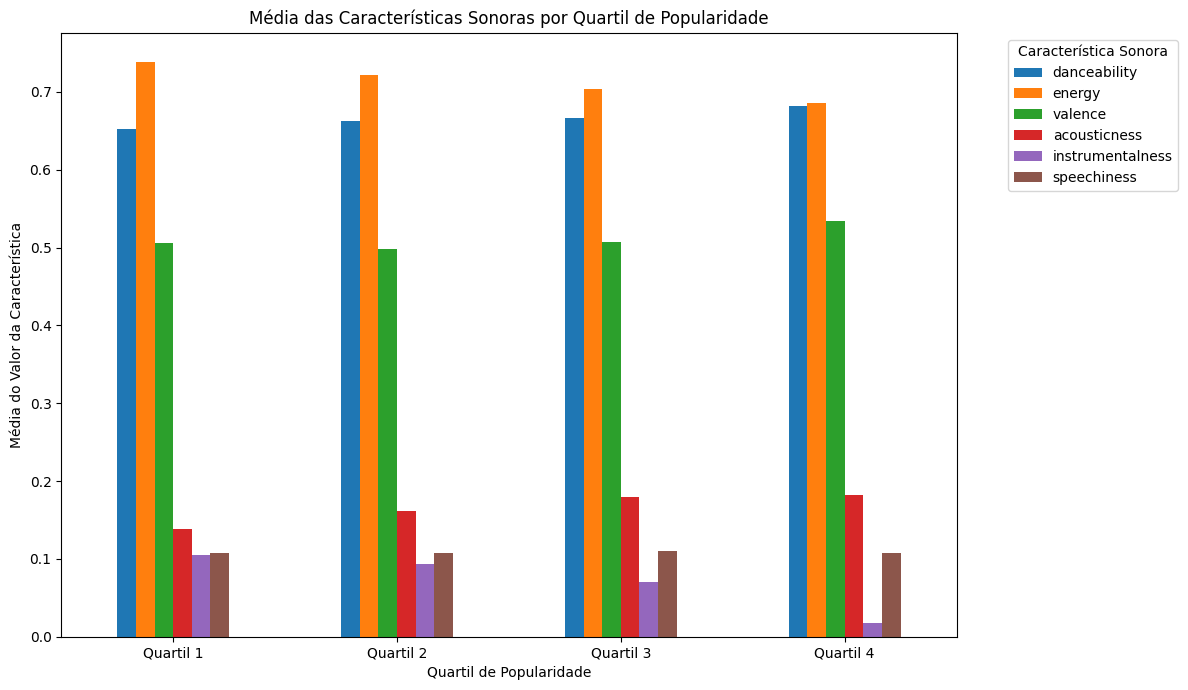

In [ ]:
# Define a lista de características a serem descritas.
caracteristicas = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'speechiness'
]

# Calcula a média das características para cada quartil.
df_mean_quartiles = pd.DataFrame({
    quartile_name: df_quartile[caracteristicas].mean()
    for quartile_name, df_quartile in quartiles.items()
})

# Plota o gráfico das características médias para cada quartil.
df_mean_quartiles.T.plot(kind='bar', figsize=(12, 7))
plt.title('Média das Características Sonoras por Quartil de Popularidade')
plt.xlabel('Quartil de Popularidade')
plt.ylabel('Média do Valor da Característica')
plt.xticks(rotation=0)
plt.legend(title='Característica Sonora', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


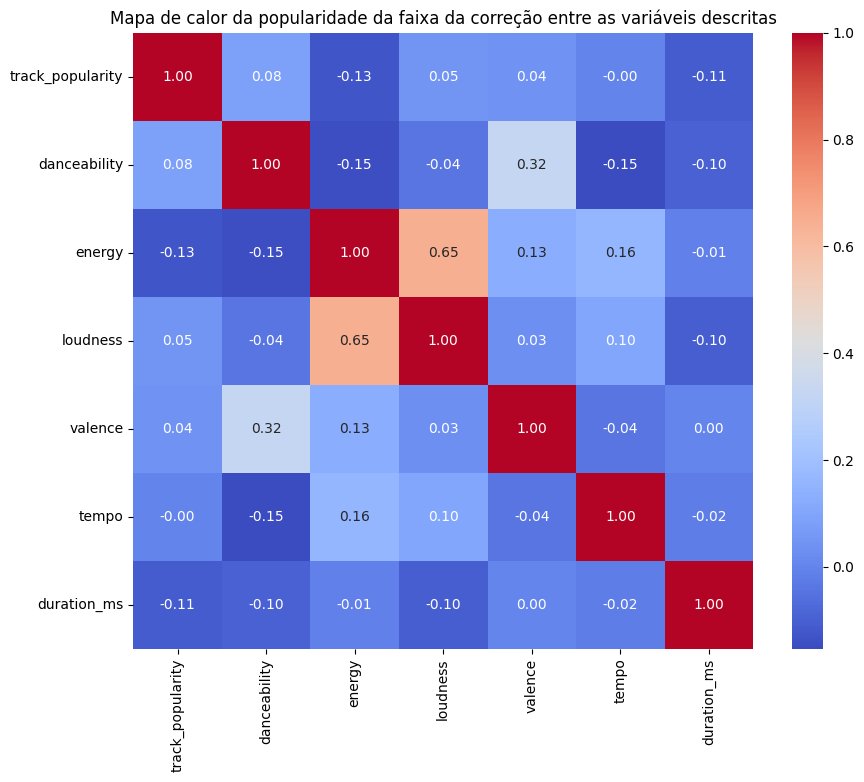

In [ ]:
# Calcula a matriz de correlação.
correlation_matrix = dfSongs[['track_popularity', 'danceability', 'energy', 'loudness',
    'valence', 'tempo', 'duration_ms']].corr()

# Cria o mapa de calor da matriz de correlação.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor da popularidade da faixa da correção entre as variáveis descritas')
plt.show()

In [ ]:
dfSongs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27751 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  27751 non-null  object        
 1   track_name                27751 non-null  object        
 2   track_artist              27751 non-null  object        
 3   track_popularity          27751 non-null  int64         
 4   track_album_id            27751 non-null  object        
 5   track_album_name          27751 non-null  object        
 6   track_album_release_date  27751 non-null  datetime64[ns]
 7   playlist_name             27751 non-null  object        
 8   playlist_id               27751 non-null  object        
 9   playlist_genre            27751 non-null  object        
 10  playlist_subgenre         27751 non-null  object        
 11  danceability              27751 non-null  float64       
 12  energy                 

Distribuíção da da popularidade por gênero musical, ou seja, quais gêneros têm, em média, músicas mais populares no Spotify.

/tmp/ipython-input-613999487.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pop_genre.values, y=pop_genre.index, palette="mako")


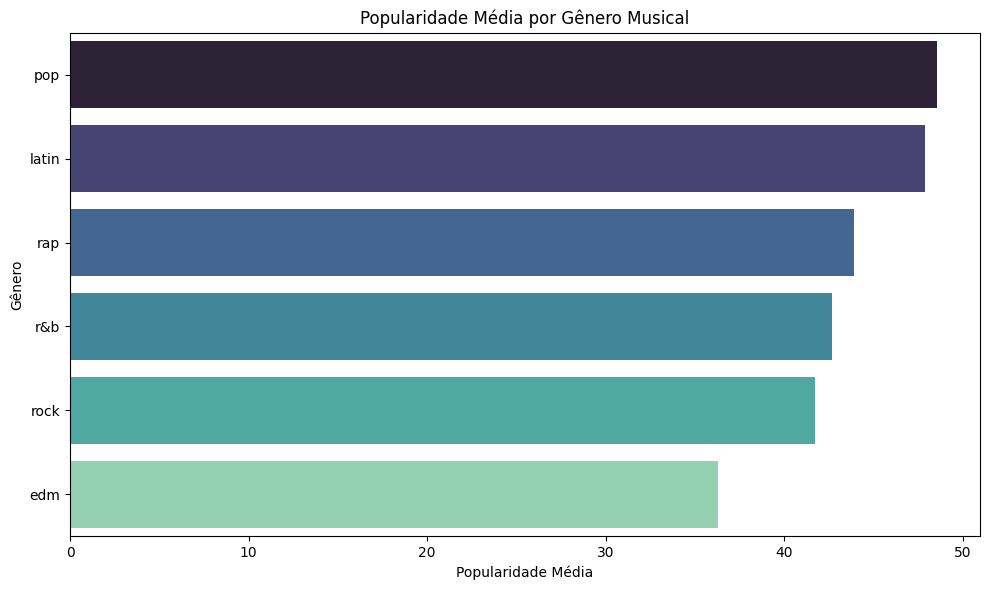

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Popularidade média por gênero ---
plt.figure(figsize=(10, 6))
pop_genre = dfSongs.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
sns.barplot(x=pop_genre.values, y=pop_genre.index, palette="mako")
plt.title('Popularidade Média por Gênero Musical')
plt.xlabel('Popularidade Média')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()


Relação que temos entre Dançabilidade e energia.

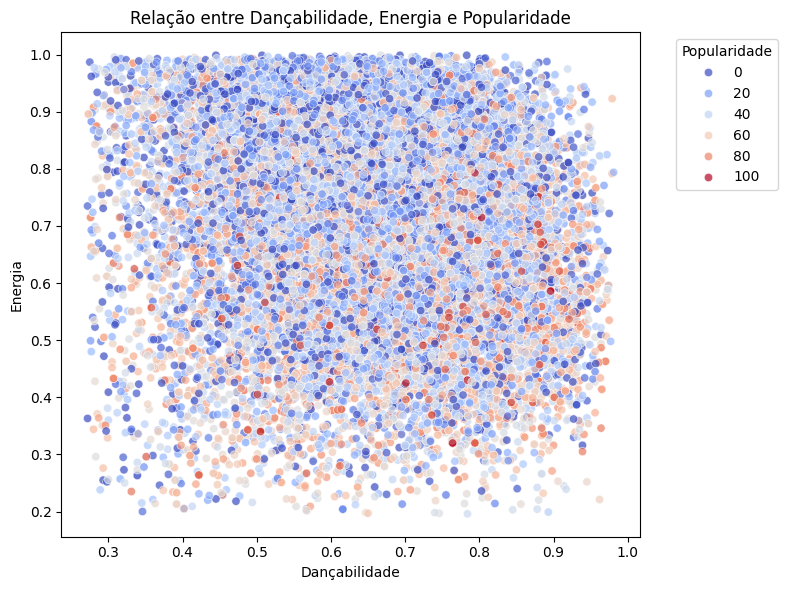

In [ ]:
#Relação entre dançabilidade e energia ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfSongs, x='danceability', y='energy',
                hue='track_popularity', palette='coolwarm', alpha=0.7)
plt.title('Relação entre Dançabilidade, Energia e Popularidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Energia')
plt.legend(title='Popularidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Comparando músicas populares com outras menos populares.

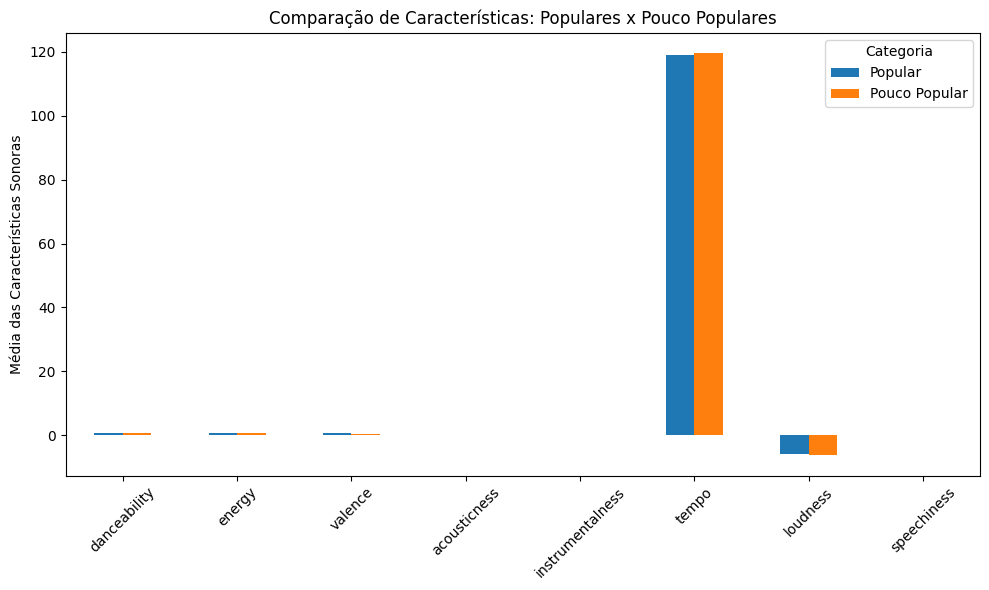

In [ ]:
#Comparação entre músicas populares e pouco populares ---
# Definir um limiar para "popular"
limiar_popular = 70
dfSongs['categoria_popularidade'] = dfSongs['track_popularity'].apply(
    lambda x: 'Popular' if x >= limiar_popular else 'Pouco Popular'
)

caracteristicas = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'tempo', 'loudness', 'speechiness'
]

# Calcular médias por categoria
df_mean = dfSongs.groupby('categoria_popularidade')[caracteristicas].mean().T

# Gráfico comparativo
df_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Características: Populares x Pouco Populares')
plt.ylabel('Média das Características Sonoras')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

Relação que temos entre popularidade e características sonoras.

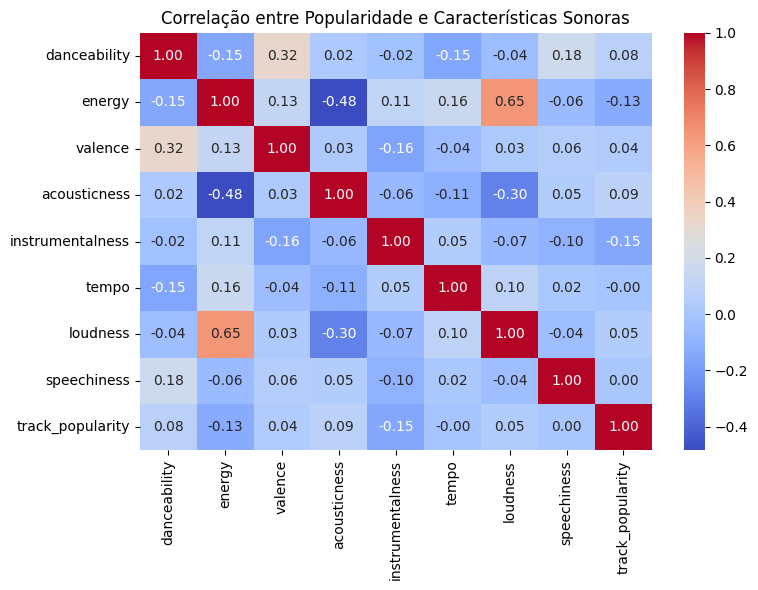

In [ ]:
#Correlação entre popularidade e características sonoras
corr = dfSongs[caracteristicas + ['track_popularity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Popularidade e Características Sonoras")
plt.tight_layout()
plt.show()

Mostrando as 5 variáveis mais correlacionadas com popularidade.


 Top 5 variáveis mais correlacionadas com a popularidade: 

acousticness    0.088383
danceability    0.081133
loudness        0.048570
valence         0.037986
speechiness     0.003230
Name: track_popularity, dtype: float64


/tmp/ipython-input-2569221711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_corr.values, y=top5_corr.index, palette='viridis')


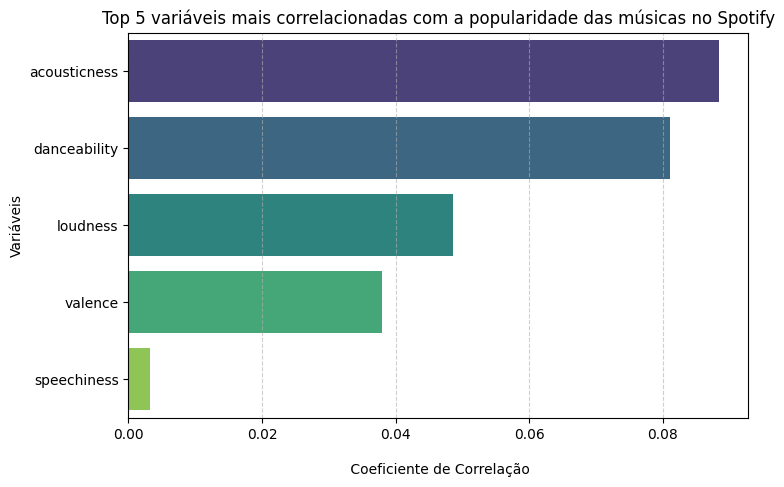

In [ ]:
#Mostrar top 5 variáveis mais correlacionadas com popularidade
corr_pop = corr['track_popularity'].drop('track_popularity').sort_values(ascending=False)
top5_corr = corr_pop.head(5)

print("\n Top 5 variáveis mais correlacionadas com a popularidade: \n")
print(top5_corr)

# Visualizando essas correlações em um gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_corr.values, y=top5_corr.index, palette='viridis')

plt.title('Top 5 variáveis mais correlacionadas com a popularidade das músicas no Spotify', fontsize=12)
plt.xlabel('\n Coeficiente de Correlação', fontsize=10)
plt.ylabel('Variáveis', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

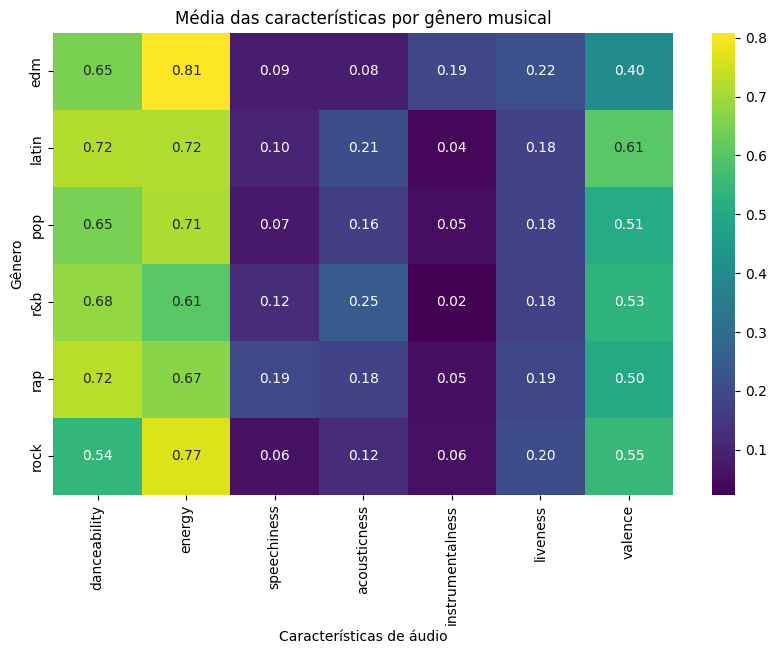

In [ ]:
# Mapa de calor de médias por gênero
caracteristicas = ["danceability", "energy", "speechiness", "acousticness",
            "instrumentalness", "liveness", "valence"]

genre_means = dfSongs.groupby("playlist_genre")[caracteristicas].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(genre_means, annot=True, cmap="viridis", fmt=".2f")
plt.title("Média das características por gênero musical")
plt.ylabel("Gênero")
plt.xlabel("Características de áudio")
plt.show()

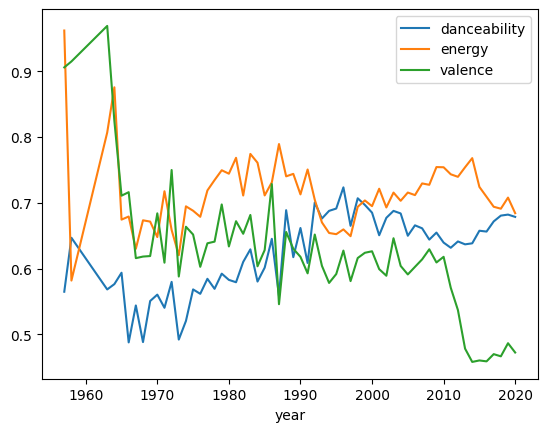

In [ ]:
# Análise das características sonoras durante todos os anos
dfSongs["year"] = dfSongs["track_album_release_date"].dt.year

caracteristicas = ["danceability", "energy", "valence"]
dfSongs.groupby("year")[caracteristicas].mean().plot()
plt.show()

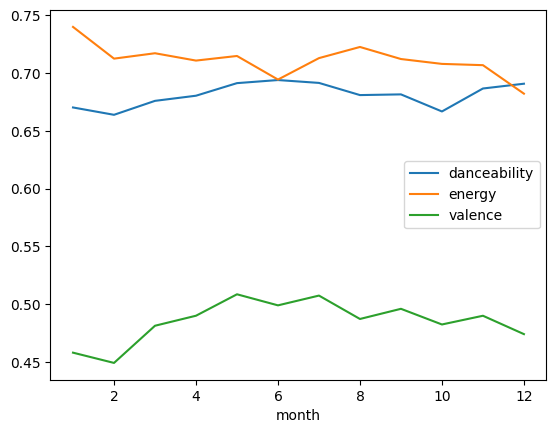

In [ ]:
# Análise das características sonoras durante o ano de 2019
dfSongs["track_album_release_date"] = pd.to_datetime(dfSongs["track_album_release_date"])

dfSongs["month"] = dfSongs["track_album_release_date"].dt.month
df_2019 = dfSongs[dfSongs["year"] == 2019]
caracteristicas = ["danceability", "energy", "valence"]
df_2019.groupby("month")[caracteristicas].mean().plot()
plt.show()

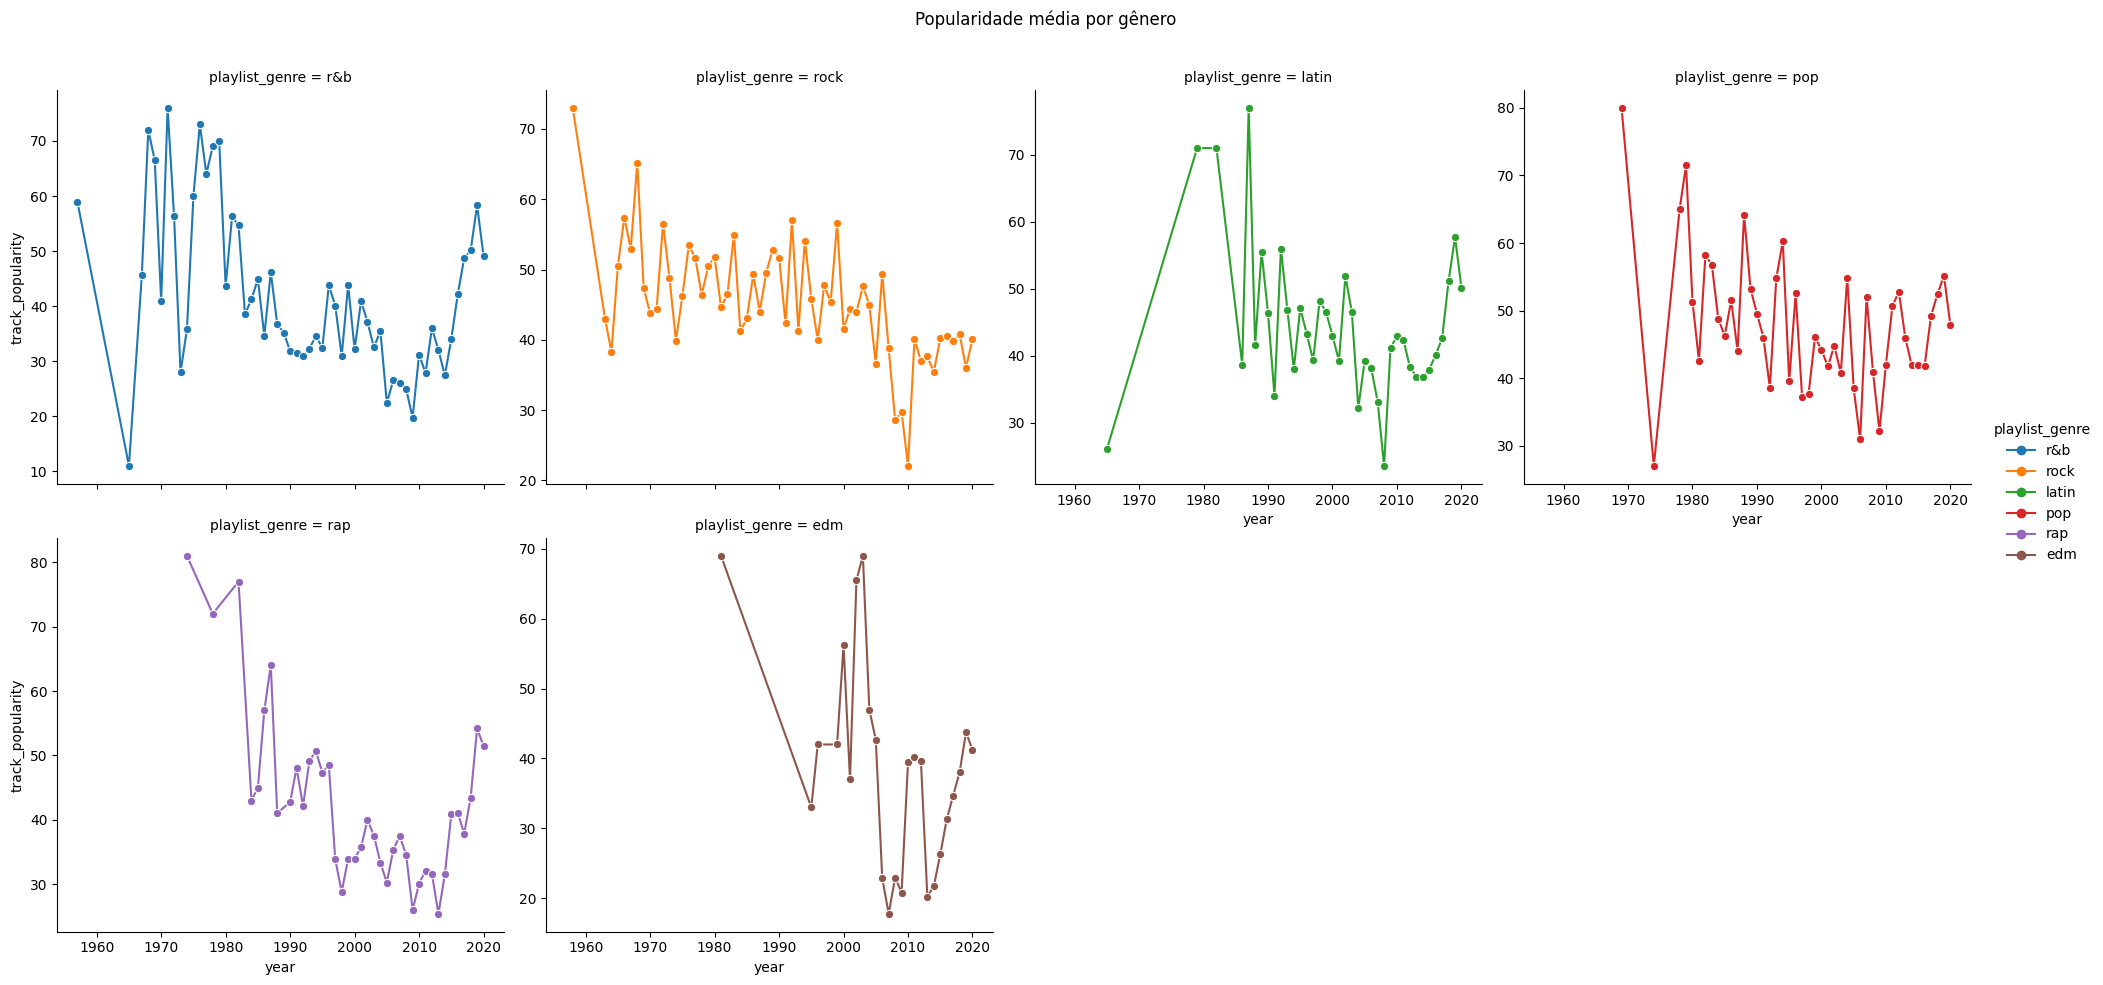

In [ ]:
#Popularidade média por gênero ao longo dos anos
genre_popularity = (
    dfSongs.groupby(["year", "playlist_genre"])["track_popularity"]
    .mean()
    .reset_index()
)

sns.relplot(
    data=genre_popularity,
    x="year",
    y="track_popularity",
    hue="playlist_genre",
    col="playlist_genre",
    col_wrap=4,
    kind="line",
    marker="o",
    facet_kws={"sharey": False}
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Popularidade média por gênero")
plt.show()

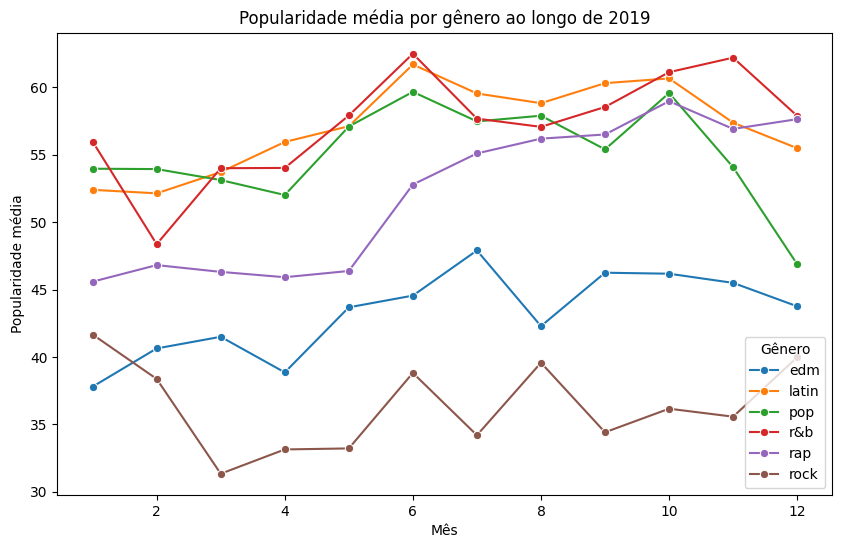

In [ ]:
# Popularidade média por gênero ao longo de 2019
genre_popularity_2019 = (
    df_2019.groupby(["month", "playlist_genre"])["track_popularity"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=genre_popularity_2019,
    x="month",
    y="track_popularity",
    hue="playlist_genre",
    marker="o"
)

plt.title("Popularidade média por gênero ao longo de 2019")
plt.xlabel("Mês")
plt.ylabel("Popularidade média")
plt.legend(title="Gênero")
plt.show()

In [ ]:
# Remover duplicatas, mantendo a versão mais popular de cada música
dfSongs_unique = (
    dfSongs.sort_values(by="track_popularity", ascending=False)
           .drop_duplicates(subset=["track_name", "track_artist"], keep="first")
)

# Filtrar músicas populares (quartil 4)
popular_tracks = dfSongs_unique[dfSongs_unique["track_popularity"] > 63]

# Filtrar apenas as músicas de 2019
df_2019_unique = dfSongs_unique[dfSongs_unique["year"] == 2019]
popular_tracks_2019 = df_2019_unique[df_2019_unique["track_popularity"] > 63]

# Exibir estatísticas
print(f"Total de músicas populares: {len(popular_tracks)}")
print(f"Total de músicas populares em 2019: {len(popular_tracks_2019)}")

# Percentual de músicas populares de 2019 em relação ao total
percent_2019 = (len(popular_tracks_2019) / len(popular_tracks)) * 100
print(f"Representam {percent_2019:.2f}% do total de músicas populares.")

# Mostrar algumas das músicas mais populares
popular_tracks[["track_name", "track_artist", "track_popularity", "playlist_genre", "year"]].head(10)

Total de músicas populares: 3981
Total de músicas populares em 2019: 1381
Representam 34.69% do total de músicas populares.


,track_name,track_artist,track_popularity,playlist_genre,year
1551,Dance Monkey,Tones and I,100,pop,2019
20092,ROXANNE,Arizona Zervas,99,latin,2019
19265,Memories,Maroon 5,98,latin,2019
18330,Circles,Post Malone,98,latin,2019
5508,The Box,Roddy Ricch,98,rap,2019
18756,Tusa,KAROL G,98,latin,2019
21571,Blinding Lights,The Weeknd,98,r&b,2019
1302,Don't Start Now,Dua Lipa,97,pop,2019
19722,Falling,Trevor Daniel,97,latin,2018
19726,RITMO (Bad Boys For Life),The Black Eyed Peas,96,latin,2019


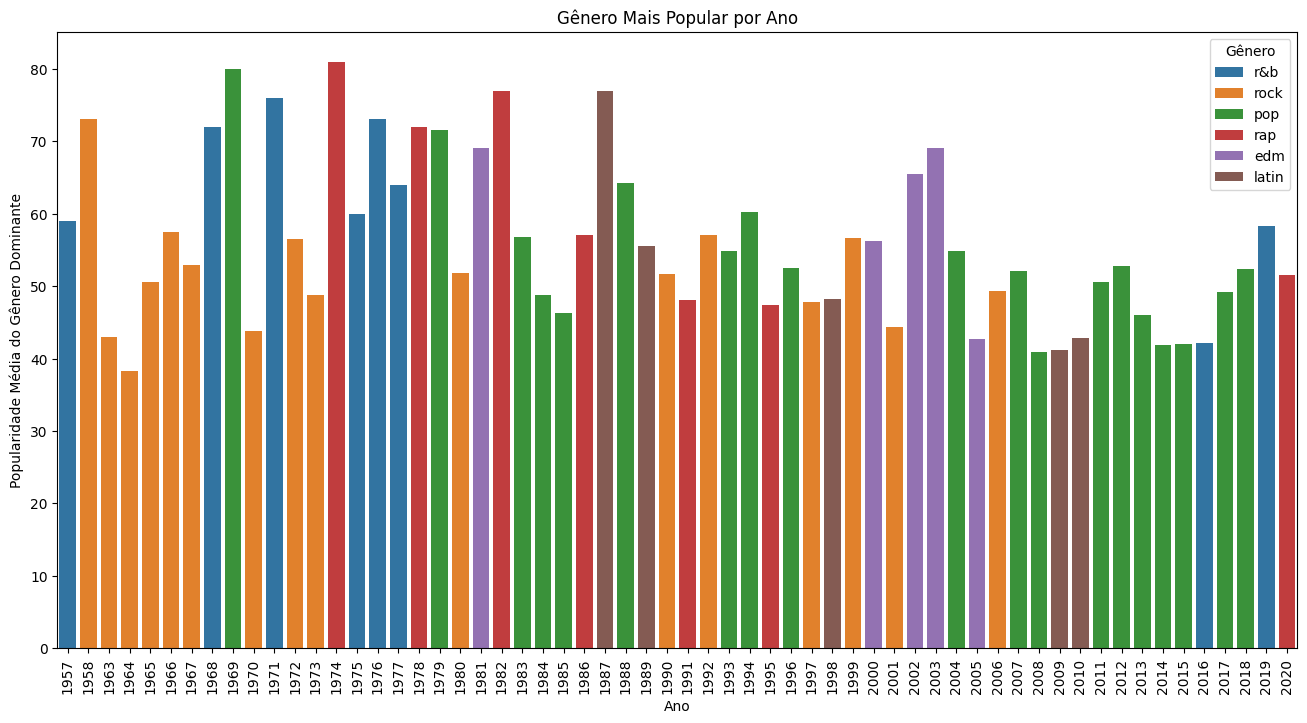

In [ ]:
# Pegar o gênero mais popular por ano
dominant_genre = (
    genre_popularity
    .sort_values(["year", "track_popularity"], ascending=[True, False])
    .drop_duplicates(subset=["year"], keep="first")
)


plt.figure(figsize=(16,8))
sns.barplot(
    data=dominant_genre,
    x="year",
    y="track_popularity",
    hue="playlist_genre",
    )

plt.title("Gênero Mais Popular por Ano")
plt.xlabel("Ano")
plt.xticks(rotation=90)
plt.ylabel("Popularidade Média do Gênero Dominante")
plt.legend(title="Gênero")
plt.show()

/tmp/ipython-input-102292871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_pop.values, y=corr_pop.index, palette='coolwarm')


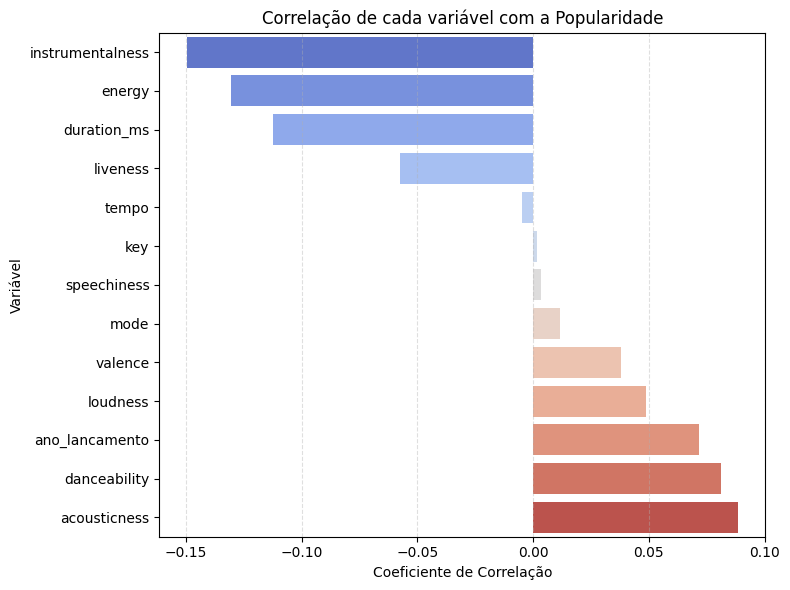

In [ ]:
# Matriz de correlação completa
corr = dfSongs.corr(numeric_only=True)
corr_pop = corr['track_popularity'].drop('track_popularity').sort_values(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=corr_pop.values, y=corr_pop.index, palette='coolwarm')
plt.title('Correlação de cada variável com a Popularidade')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

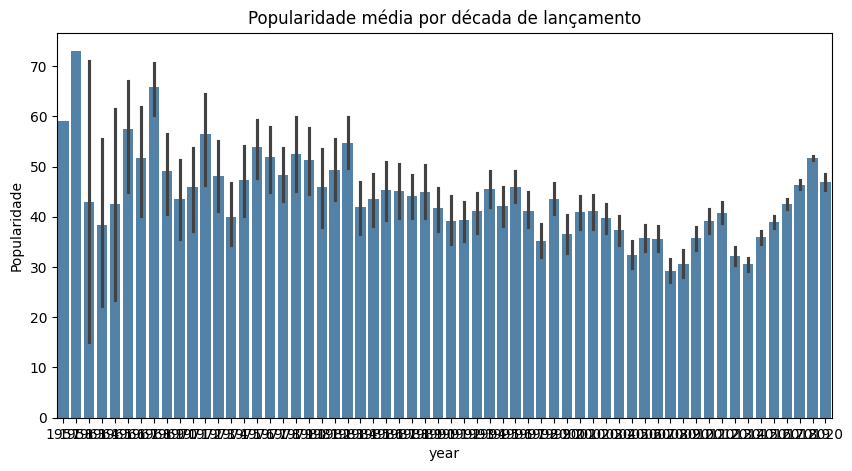

In [ ]:
dfSongs['decada'] = (dfSongs['year'] // 10) * 10

plt.figure(figsize=(10,5))
sns.barplot(
    data=dfSongs,
    x='year',
    y='track_popularity',
    color='steelblue'
)
plt.title('Popularidade média por década de lançamento')
plt.ylabel('Popularidade')
plt.show()


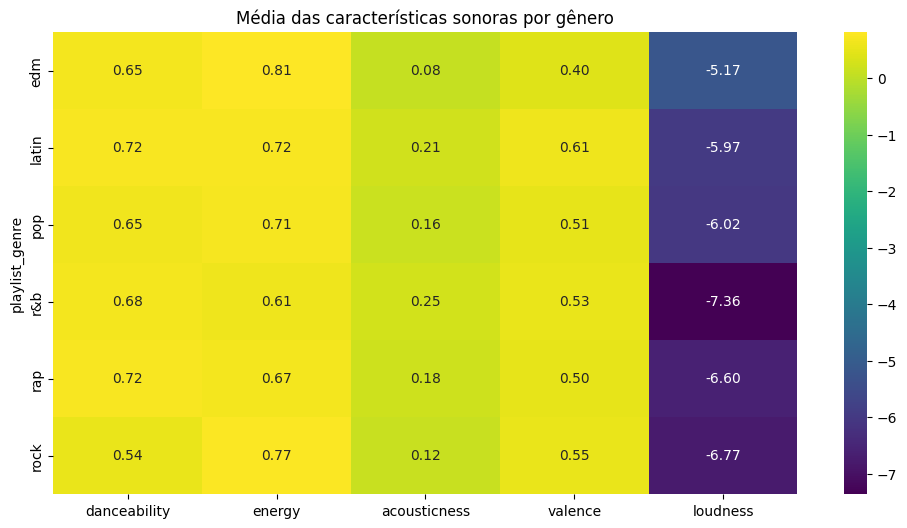

In [ ]:
caracteristicas = ['danceability','energy','acousticness','valence','loudness']

genre_features = dfSongs.groupby('playlist_genre')[caracteristicas].mean()

plt.figure(figsize=(12,6))
sns.heatmap(genre_features, annot=True, fmt=".2f", cmap='viridis')
plt.title('Média das características sonoras por gênero')
plt.show()


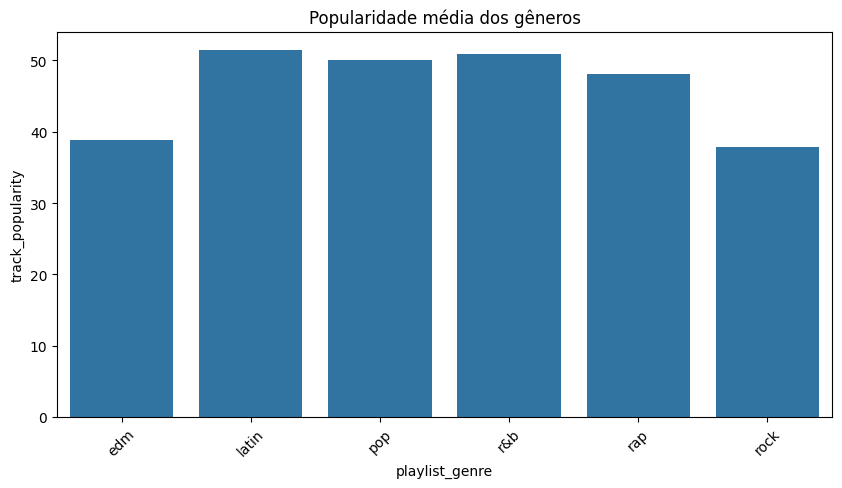

In [ ]:
recent = dfSongs[dfSongs['year'] >= 2015]

plt.figure(figsize=(10,5))
sns.barplot(
    data=recent.groupby('playlist_genre')['track_popularity'].mean().reset_index(),
    x='playlist_genre',
    y='track_popularity'
)
plt.title('Popularidade média dos gêneros')
plt.xticks(rotation=45)
plt.show()


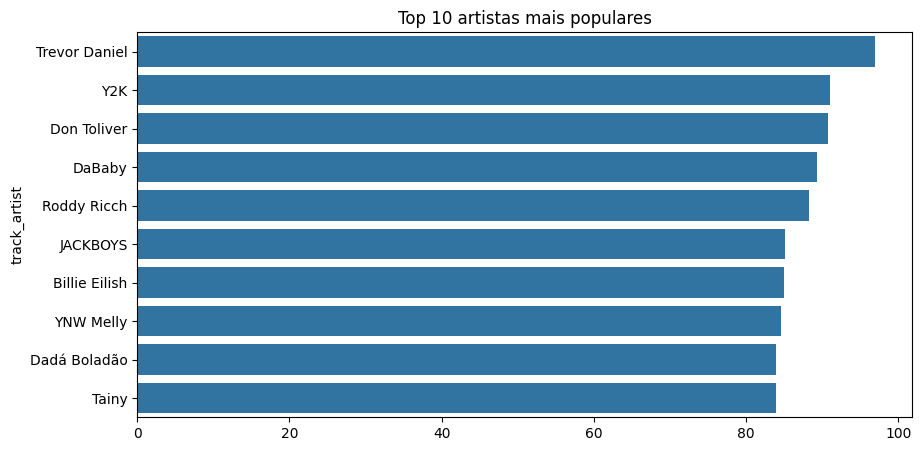

In [ ]:
top_artists = (
    dfSongs.groupby('track_artist')['track_popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 artistas mais populares')
plt.show()


/tmp/ipython-input-3231781034.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


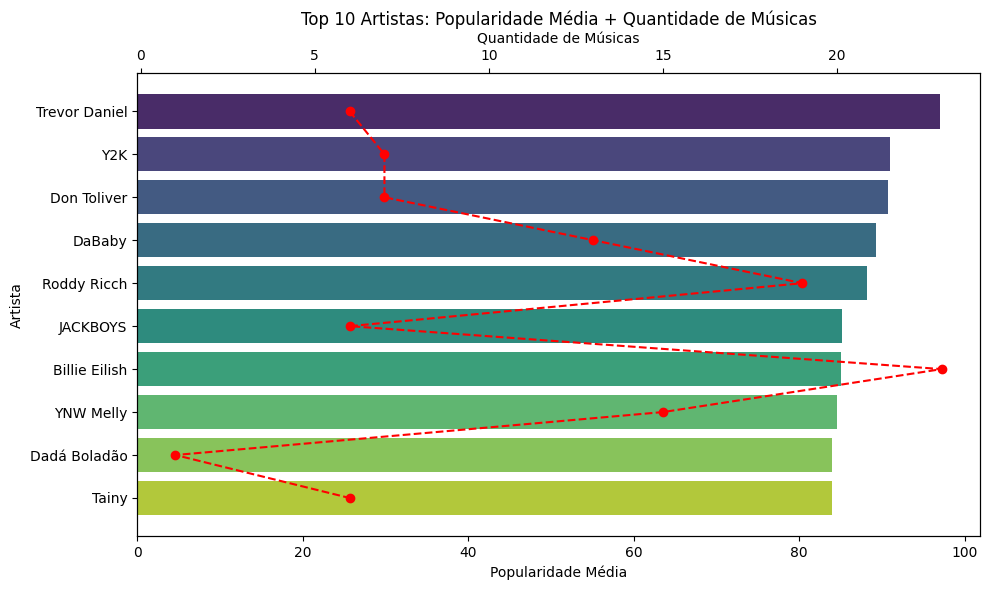

,popularidade_media,quantidade_musicas
track_artist,,
Trevor Daniel,97.000000,6
Y2K,91.000000,7
Don Toliver,90.714286,7
DaBaby,89.307692,13
Roddy Ricch,88.210526,19
JACKBOYS,85.166667,6
Billie Eilish,85.043478,23
YNW Melly,84.600000,15
Dadá Boladão,84.000000,1


In [ ]:
# 1. Cálculo da popularidade média por artista
artist_popularity = (
    dfSongs.groupby('track_artist')['track_popularity']
    .mean()
)

# 2. Cálculo da quantidade de músicas por artista na base
artist_count = (
    dfSongs.groupby('track_artist')['track_id']
    .count()
)

# 3. Criar dataset unificado
artist_stats = pd.DataFrame({
    'popularidade_media': artist_popularity,
    'quantidade_musicas': artist_count
})

# 4. Selecionar os top 10 artistas por popularidade média
top10_artists = artist_stats.sort_values('popularidade_media', ascending=False).head(10)

# ================================
# GRÁFICO 3 — COMBINADO
# ================================

fig, ax1 = plt.subplots(figsize=(10,6))

# Barras de popularidade
sns.barplot(
    x=top10_artists['popularidade_media'],
    y=top10_artists.index,
    palette='viridis',
    ax=ax1
)

ax1.set_xlabel('Popularidade Média')
ax1.set_ylabel('Artista')
ax1.set_title('Top 10 Artistas: Popularidade Média + Quantidade de Músicas')

# Segundo eixo — quantidade de músicas
ax2 = ax1.twiny()
ax2.plot(
    top10_artists['quantidade_musicas'],
    top10_artists.index,
    'o--',
    color='red',
    label='Quantidade de músicas'
)

ax2.set_xlabel('Quantidade de Músicas')

plt.tight_layout()
plt.show()

# Exibir valores em tabela também
top10_artists

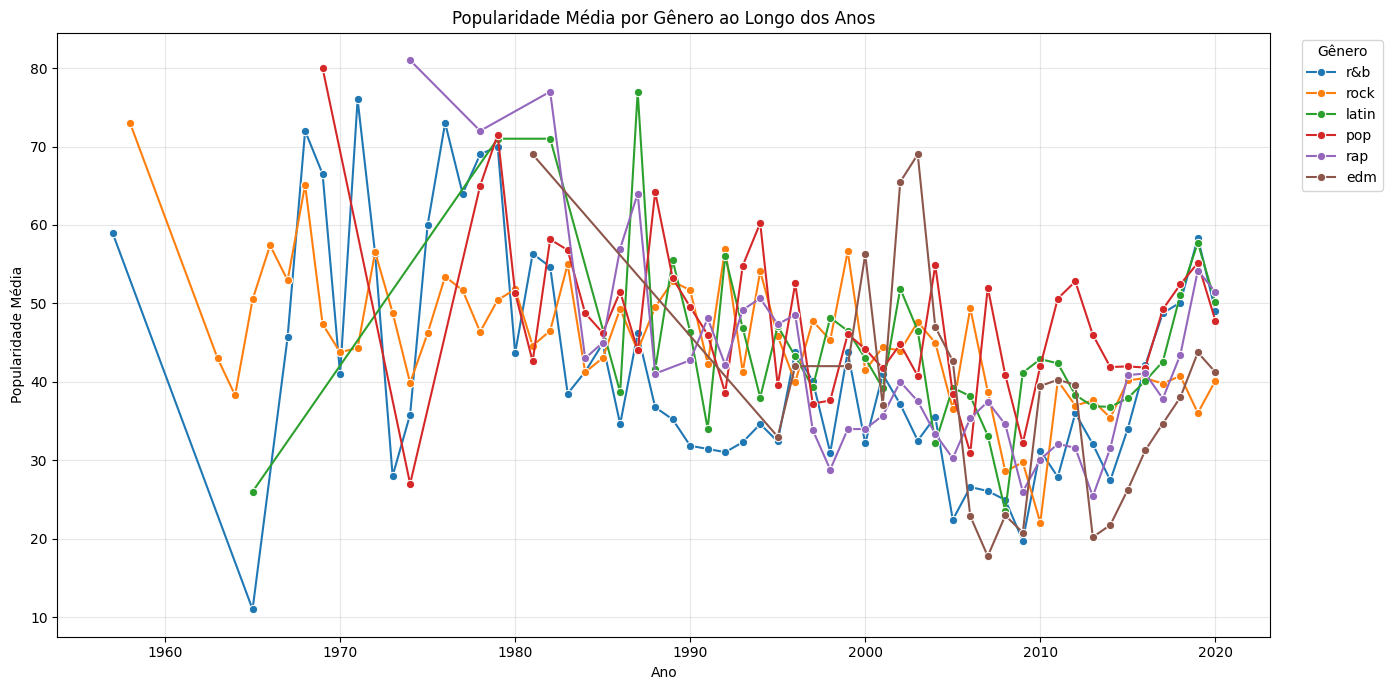

In [ ]:
# Garantir que o ano está extraído
dfSongs['year'] = dfSongs['track_album_release_date'].dt.year

# Agrupar por ano e gênero
genre_popularity_year = (
    dfSongs.groupby(['year', 'playlist_genre'])['track_popularity']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=genre_popularity_year,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    marker='o'
)

plt.title('Popularidade Média por Gênero ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid(True, alpha=0.3)
plt.legend(title='Gênero', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


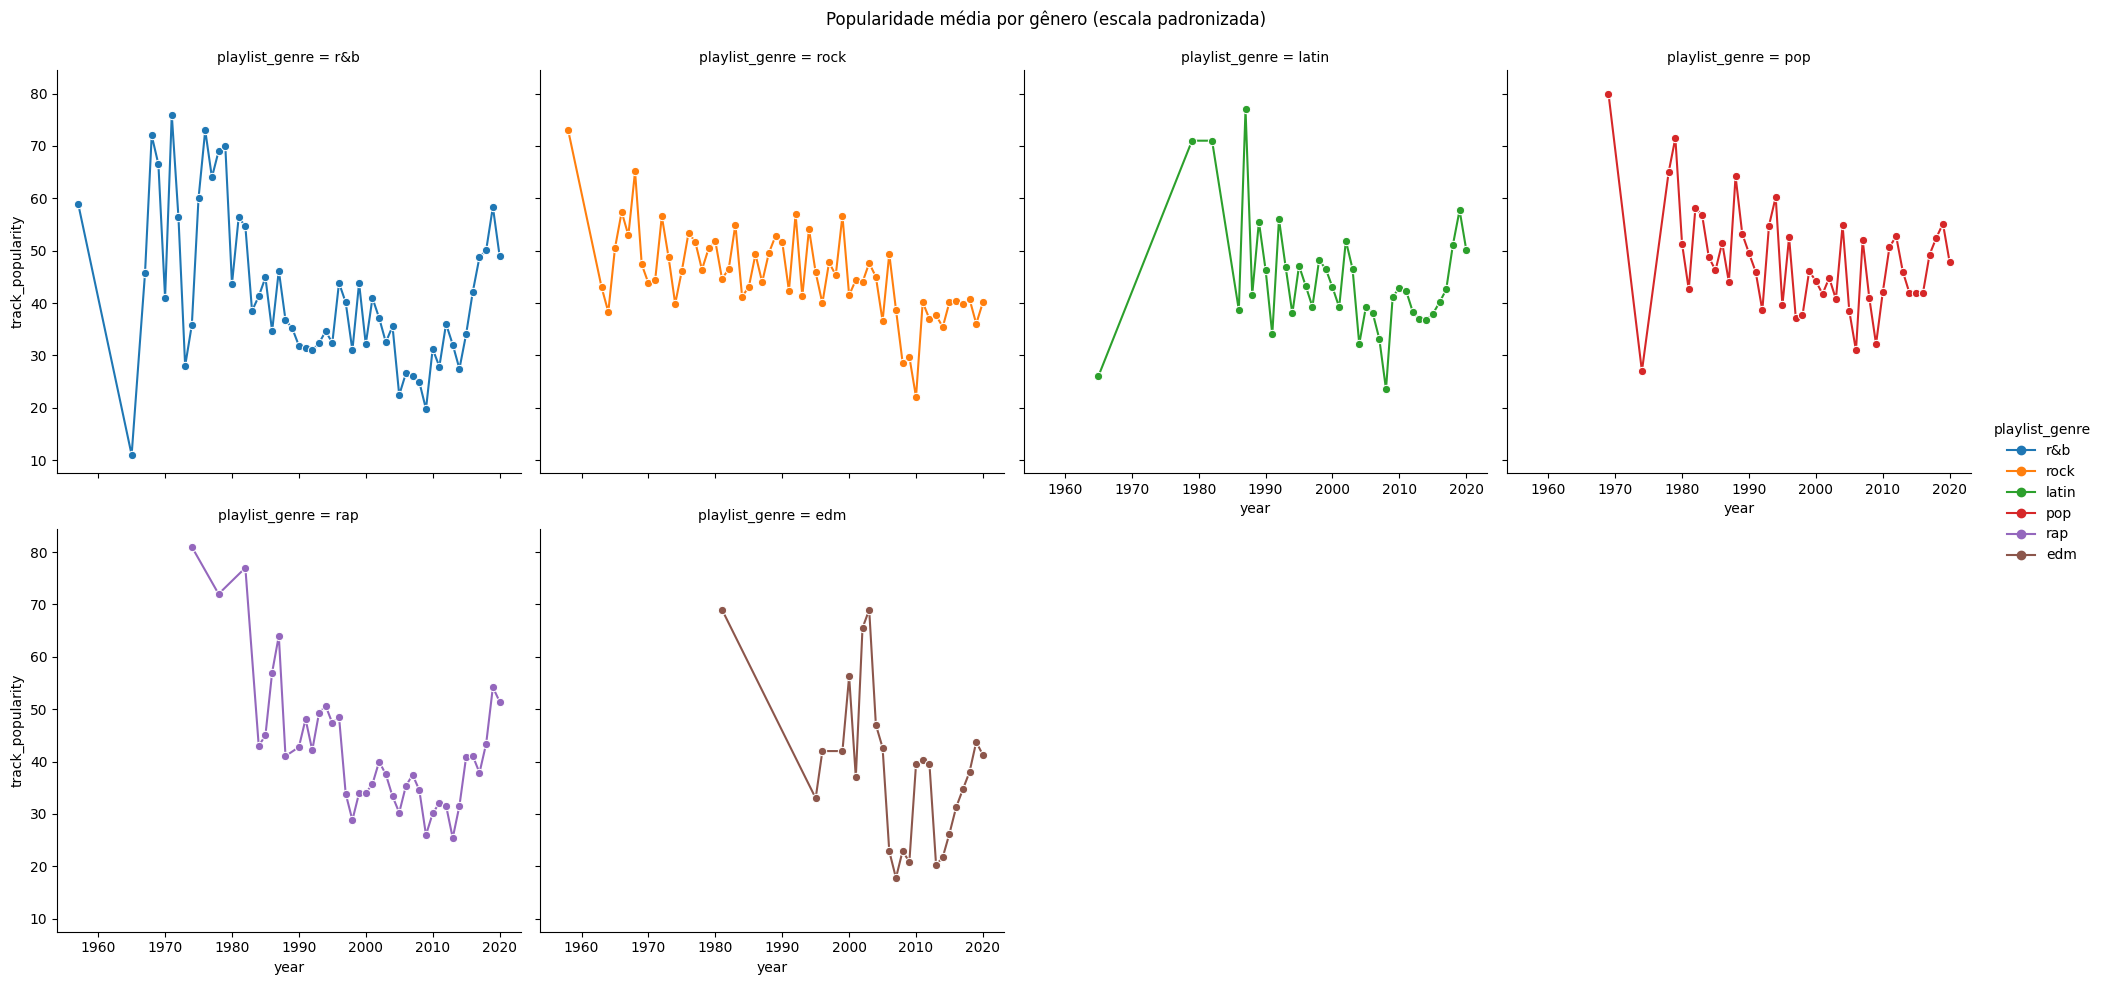

In [ ]:
facet_kws={"sharey": True}
# Popularidade média por gênero ao longo dos anos
genre_popularity = (
    dfSongs.groupby(["year", "playlist_genre"])["track_popularity"]
    .mean()
    .reset_index()
)

g = sns.relplot(
    data=genre_popularity,
    x="year",
    y="track_popularity",
    hue="playlist_genre",
    col="playlist_genre",
    col_wrap=4,
    kind="line",
    marker="o",
    facet_kws={"sharey": True}   # <<< coloca todos na mesma escala
)

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Popularidade média por gênero (escala padronizada)")

plt.show()
